## Quantum Circuit:

#### Made by Lord Sen

Quantum Safe Cryptography, also known as Post-Quantum Cryptography (PQC), refers to cryptographic algorithms that are designed to be secure against quantum computing attacks. Quantum computers are expected to break many of the classical cryptographic algorithms currently in use, such as RSA and ECC (Elliptic Curve Cryptography), due to their ability to solve certain problems (like factoring large numbers and computing discrete logarithms) more efficiently. PQC algorithms are designed to resist such attacks.

## Key Types of Algorithms Used in Quantum Safe Cryptography:
There are five main categories of quantum-safe cryptographic algorithms:

### Lattice-based Cryptography:

### Algorithms: NTRU, Kyber, FrodoKEM, Dilithium
Description: These rely on hard problems in lattice mathematics, such as the Learning With Errors (LWE) or Shortest Vector Problem (SVP). These problems are believed to be resistant to both classical and quantum attacks.
Strength: Efficient and versatile, well-studied for both encryption and signatures.
Code-based Cryptography:

### Algorithms: McEliece, Classic McEliece, BIKE
Description: Based on error-correcting codes, these systems derive their security from the difficulty of decoding a general linear code, a problem that is hard even for quantum computers.
Strength: Known for strong security guarantees, but often require large key sizes.
Multivariate Polynomial Cryptography:

### Algorithms: Rainbow, GeMSS
Description: These algorithms are based on the difficulty of solving systems of multivariate quadratic equations, which are known to be hard for both classical and quantum computers.
Strength: Typically used for digital signatures rather than encryption due to relatively large public key sizes.
Hash-based Cryptography:

### Algorithms: SPHINCS+, LMS, XMSS
Description: These schemes rely on the security of cryptographic hash functions. Hash-based signature schemes are considered quantum-safe because breaking a cryptographic hash is believed to be resistant to quantum attacks (as long as the hash function is resistant to quantum algorithms like Grover’s algorithm).
Strength: Simple and secure, especially for digital signatures, though not suited for encryption.
Isogeny-based Cryptography:

### Algorithms: SIKE (Supersingular Isogeny Key Encapsulation)
Description: Based on the difficulty of finding isogenies between supersingular elliptic curves. This is a newer approach and is considered highly promising for creating compact public keys.
Strength: Offers very small key sizes, but is relatively new and under scrutiny for long-term security.
Prominent Post-Quantum Algorithms:
Kyber: A lattice-based key encapsulation mechanism (KEM), highly efficient and widely considered for future quantum-safe encryption.
Dilithium: A lattice-based signature algorithm offering high security and efficiency.
McEliece: A code-based encryption algorithm known for its strong security track record but large key sizes.
SPHINCS+: A hash-based signature scheme, providing strong security with relatively large signatures but designed for long-term protection against quantum attacks.
Example Quantum-Safe Algorithms in Detail:
Kyber (Lattice-based):

Security: Based on the Learning With Errors (LWE) problem.
Application: Key encapsulation mechanism (KEM) for secure key exchange.
Key Features: Efficient, small ciphertext sizes, moderate key sizes.
Dilithium (Lattice-based):

Security: Based on the hardness of lattice problems.
Application: Digital signatures.
Key Features: Efficient, highly secure, smaller signatures.
SPHINCS+ (Hash-based):

Security: Based on the security of cryptographic hash functions.
Application: Digital signatures.
Key Features: Stateless, resistant to quantum attacks, but produces larger signatures.
Classic McEliece (Code-based):

Security: Based on the hardness of decoding random linear codes.
Application: Asymmetric encryption.
Key Features: Extremely secure but uses very large keys.
NIST Post-Quantum Cryptography Standardization:
The National Institute of Standards and Technology (NIST) has been running a competition to standardize quantum-safe cryptographic algorithms. The process is currently in its final stages, and some finalists include:

Kyber (for encryption/key encapsulation).
Dilithium (for digital signatures).
Falcon (another lattice-based signature scheme).
SPHINCS+ (hash-based signature scheme).
These algorithms are expected to form the backbone of future quantum-resistant cryptography standards.

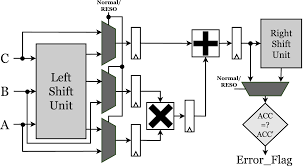

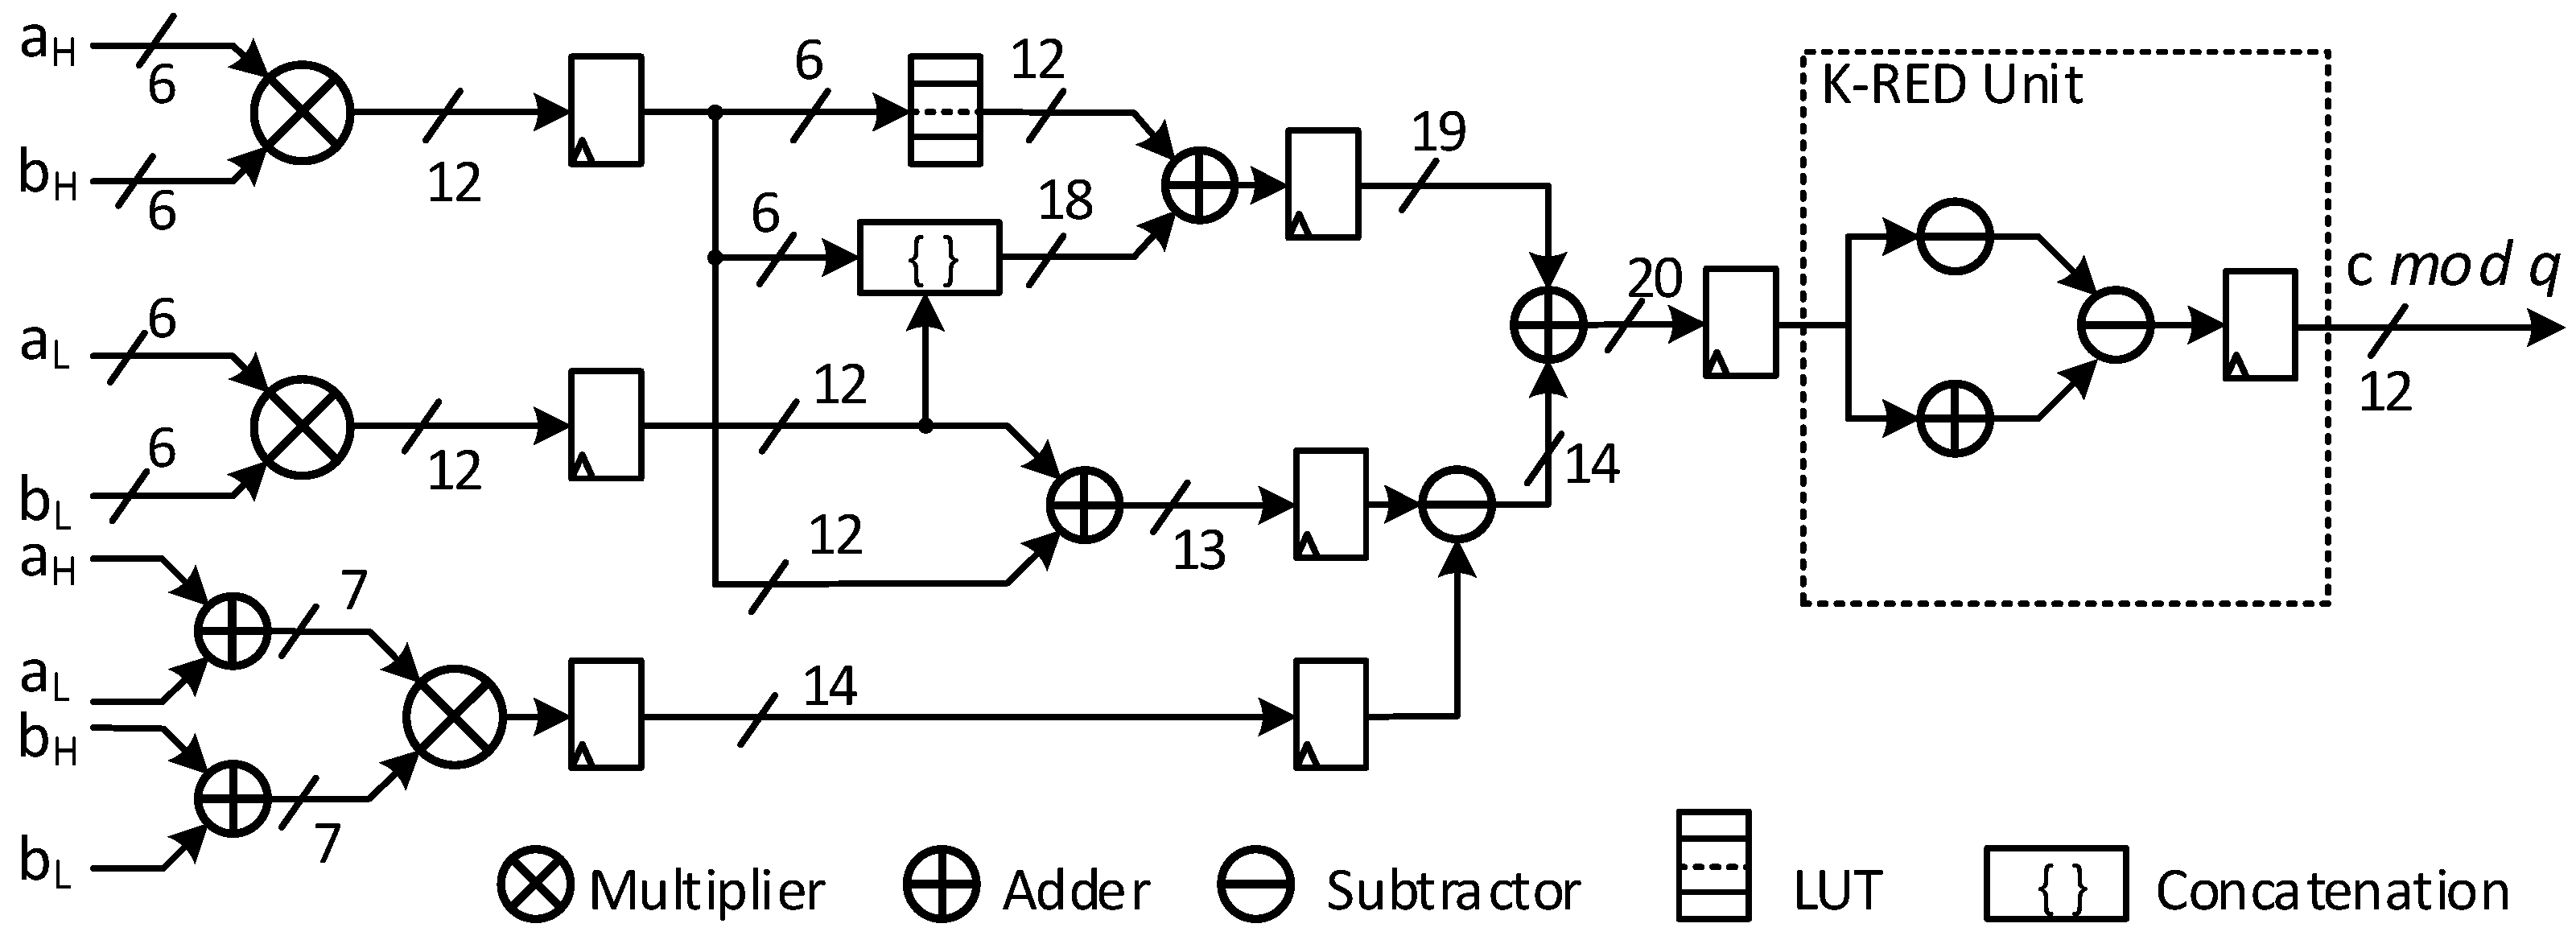

## Example Code:

In [ ]:
from qiskit import QuantumCircuit, Aer, execute
from qiskit.visualization import plot_histogram
import numpy as np
import random

# Define number of qubits (length of the key)
num_qubits = 10

# Alice's random bits
alice_bits = np.random.randint(2, size=num_qubits)
# Alice's random bases (0 for standard basis, 1 for diagonal basis)
alice_bases = np.random.randint(2, size=num_qubits)

# Bob's random bases
bob_bases = np.random.randint(2, size=num_qubits)

# Create a quantum circuit for Alice
qc = QuantumCircuit(num_qubits, num_qubits)

# Alice prepares qubits
for i in range(num_qubits):
    # Encode Alice's bits in her chosen basis
    if alice_bases[i] == 0:  # Standard basis (|0⟩ or |1⟩)
        if alice_bits[i] == 1:
            qc.x(i)
    else:  # Diagonal basis (|+⟩ or |−⟩)
        if alice_bits[i] == 1:
            qc.x(i)
        qc.h(i)

# Bob measures in his randomly chosen bases
for i in range(num_qubits):
    if bob_bases[i] == 1:
        qc.h(i)  # Measure in diagonal basis
    qc.measure(i, i)

# Simulate the circuit
simulator = Aer.get_backend('qasm_simulator')
result = execute(qc, simulator, shots=1).result()
counts = result.get_counts(qc)

# Extract the measurement results
bob_results = [int(bit) for bit in list(counts.keys())[0]]

# Compare Alice's and Bob's bases to determine the final key
key = []
for i in range(num_qubits):
    if alice_bases[i] == bob_bases[i]:
        key.append(alice_bits[i])

print("Alice's bits:      ", alice_bits)
print("Alice's bases:     ", alice_bases)
print("Bob's bases:       ", bob_bases)
print("Bob's measurements:", bob_results)
print("Shared key:        ", key)

# Draw the circuit
qc.draw('mpl')